In [17]:
import numpy as np

In [18]:
V1 = 0.5
V2_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] #np.linspace(0.0001, 0.5, num=1000)
a_list = np.linspace(0.00001, 1.7, num=1000)
b_list = np.linspace(0.00001, 3, num=1000)

In [19]:
def inequality_tightly_packed(V1, V2, a, b, A_a):
    return 3*V1 + V2*(13- 4*A_a**2) + 4*A_a*(V1+2*V2) < 3*(a + np.sqrt((V1 - a - V2)**2 + 4*b**2))

def other_inequality(V1, V2, a, b, A_a):
    return 9*V1 + V2*(9 + 4*A_a + A_a**2) < 9*a + 9*np.sqrt((V1 - a - V2)**2 + 4*b**2)

reslist = []
smallest = 0
#highest = 0
for V2 in V2_list:
    print("V_2 = ", V2)
    sublist = []
    for a in a_list:
        smallest = 0
        highest = 0
        for b in b_list:
            y = (V1 - V2 - a)/b
            A_a = 1/(1 + y**2/2 * (1+ 2/y**2 - np.sqrt(1 + 4/y**2)))
            if inequality_tightly_packed(V1, V2, a, b, A_a):
                if smallest == 0:
                    smallest = b
                break
                #highest = b
        sublist.append((V2, a, smallest))
        #reslist.append((V2, a, highest))
    reslist.append(sublist)


V_2 =  1e-05
V_2 =  0.0001
V_2 =  0.001
V_2 =  0.01
V_2 =  0.1
V_2 =  0.2
V_2 =  0.3


In [20]:
reslist = np.array(reslist)
V2_res_list = []
a_reslist = []
b_reslist = []
for sublist in reslist:
    k, l, m = zip(*sublist)
    V2_res_list.append(k)
    a_reslist.append(l)
    b_reslist.append(m) 

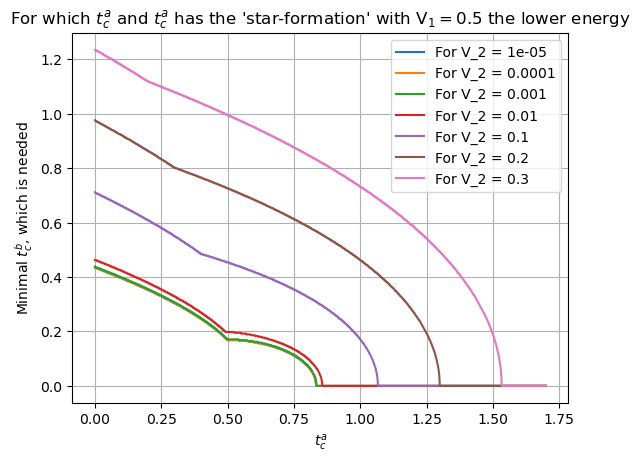

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i in range(len(V2_list)):
    label = "For V_2 = "+str(V2_list[i])
    ax.plot(a_reslist[i], b_reslist[i], label=label)

ax.set_title(r"For which $t_c^a$ and $t_c^a$ has the 'star-formation' with V$_1=$"+str(V1)+r" the lower energy")
ax.set_xlabel(r"$t_c^a$")#
ax.set_ylabel(r"Minimal $t_c^b$, which is needed")
ax.grid()
ax.legend()
plt.savefig("inequality"+".svg", dpi=300)
    #ax.set_yscale('log')
    
plt.show()

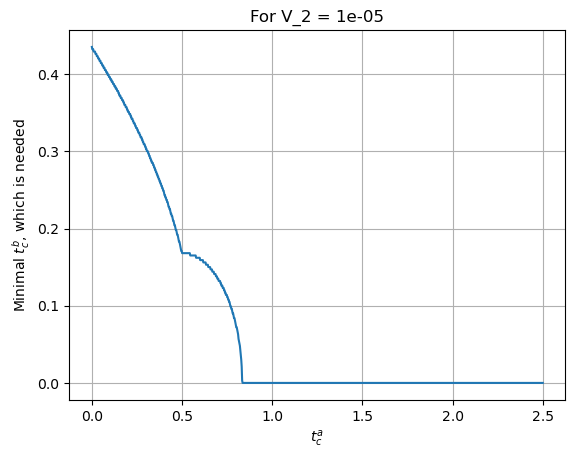

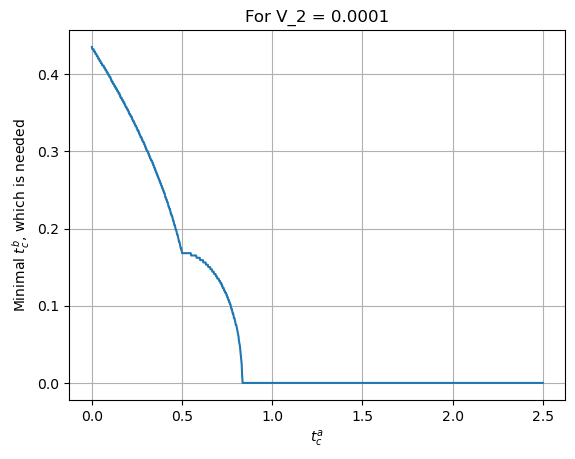

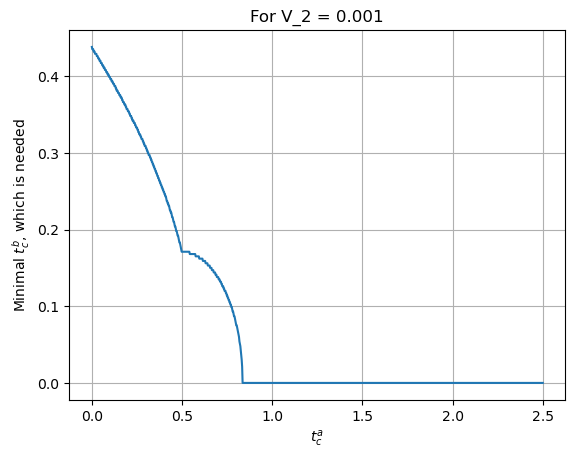

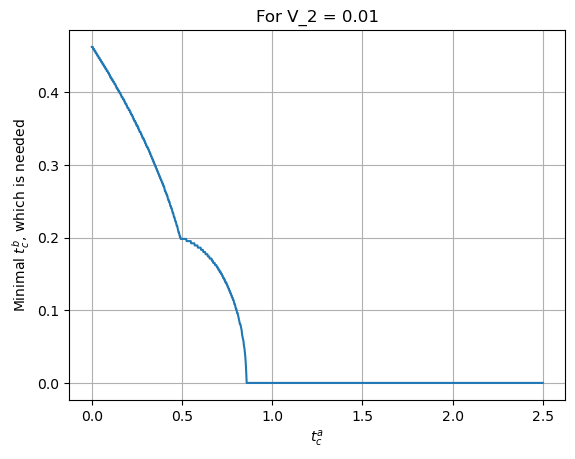

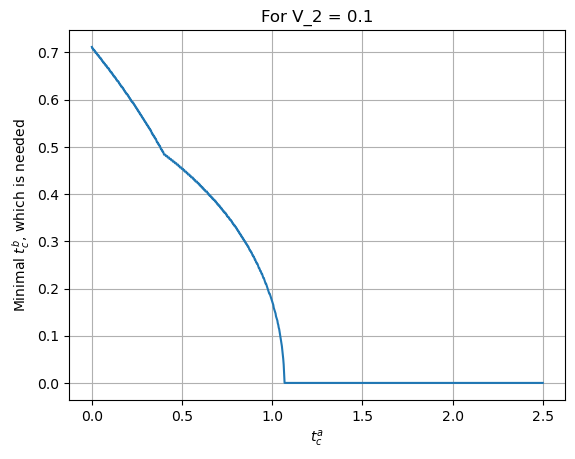

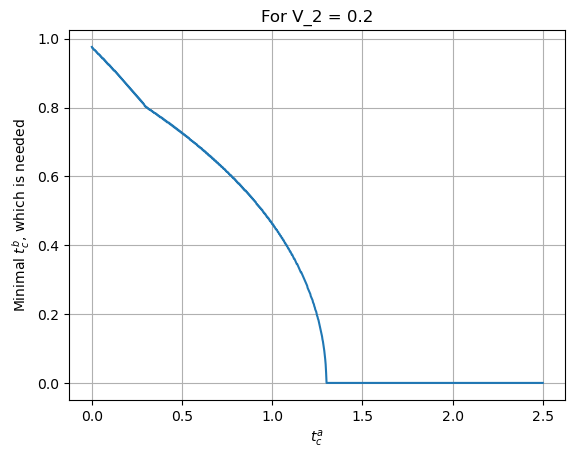

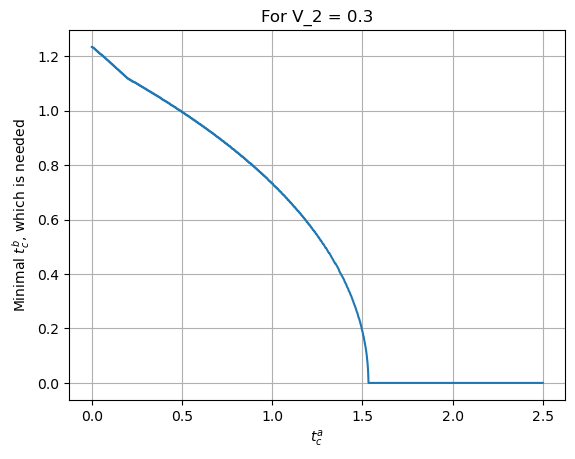

In [6]:
for i in range(len(V2_list)):
    title = "For V_2 = "+str(V2_list[i])
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.plot(a_reslist[i], b_reslist[i])
    ax.set_xlabel(r"$t_c^a$")#
    ax.set_ylabel(r"Minimal $t_c^b$, which is needed")
    ax.grid()
    
    plt.savefig(title+".svg", dpi=300)
    #ax.set_yscale('log')
    
plt.show()